In [10]:
%config InlineBackend.figure_format = 'retina'


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from battleship.board import Board
from battleship.agents import EIGCalculator, Question, CodeQuestion, binary_entropy

sns.set_theme(style="whitegrid")

In [12]:
import inspect

def answer(true_board: np.ndarray, partial_board: np.ndarray) -> bool:
    return np.random.choice([True, False])

# Convert the answer function to a string literal dynamically
answer_random_str = inspect.getsource(answer).strip()
answer_random_str

def answer(true_board: np.ndarray, partial_board: np.ndarray) -> bool:
    return True

answer_true_str = inspect.getsource(answer).strip()
answer_true_str


def answer(true_board: np.ndarray, partial_board: np.ndarray) -> bool:
    return None

answer_none_str = inspect.getsource(answer).strip()
answer_none_str

'def answer(true_board: np.ndarray, partial_board: np.ndarray) -> bool:\n    return None'

In [13]:
question = Question(
    text="",
)

code_question_random = CodeQuestion(
    question=question,
    fn_text=answer_random_str,
    translation_prompt="",
    completion={},
)

code_question_true = CodeQuestion(
    question=question,
    fn_text=answer_true_str,
    translation_prompt="",
    completion={},
)

code_question_none = CodeQuestion(
    question=question,
    fn_text=answer_none_str,
    translation_prompt="",
    completion={},
)

BOARD_EMPTY = Board(np.full((8, 8), -1))
calculator = EIGCalculator(seed=42, samples=10000, epsilon=0.0)
eig_value_random = calculator(code_question_random, BOARD_EMPTY)
print(f"EIG value for random answer: {eig_value_random}")

eig_value_true = calculator(code_question_true, BOARD_EMPTY)
print(f"EIG value for true answer: {eig_value_true}")

eig_value_none = calculator(code_question_none, BOARD_EMPTY)
print(f"EIG value for none answer: {eig_value_none}")

EIG value for random answer: 0.999918947874727
EIG value for true answer: 0


CodeQuestion returned None - skipping EIG calculation


EIG value for none answer: nan


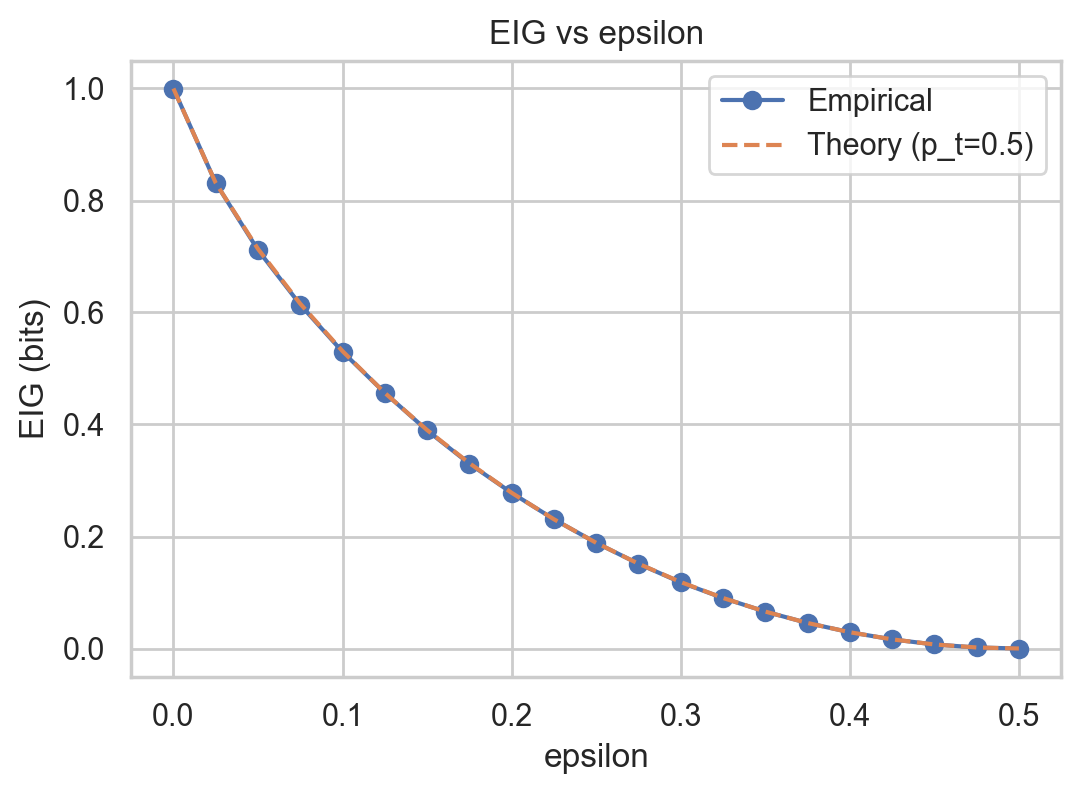

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Sweep epsilon in [0.0, 0.5]
epsilons = np.linspace(0.0, 0.5, 21)

# Compute empirical EIG for each epsilon
eig_values = [
    EIGCalculator(seed=42, samples=1000, epsilon=eps)(code_question_random, BOARD_EMPTY)
    for eps in epsilons
]

# Theoretical EIG for p_t = 0.5: H(0.5) - H(epsilon)
H_half = binary_entropy(0.5)
theoretical_values = [H_half - binary_entropy(eps) for eps in epsilons]

# Plot
plt.figure(figsize=(6, 4))
plt.plot(epsilons, eig_values, marker="o", label="Empirical")
plt.plot(epsilons, theoretical_values, linestyle="--", label="Theory (p_t=0.5)")
plt.xlabel("epsilon")
plt.ylabel("EIG (bits)")
plt.title("EIG vs epsilon")
plt.grid(True)
plt.legend()
plt.savefig("eig_vs_epsilon.png", bbox_inches="tight", dpi=300)

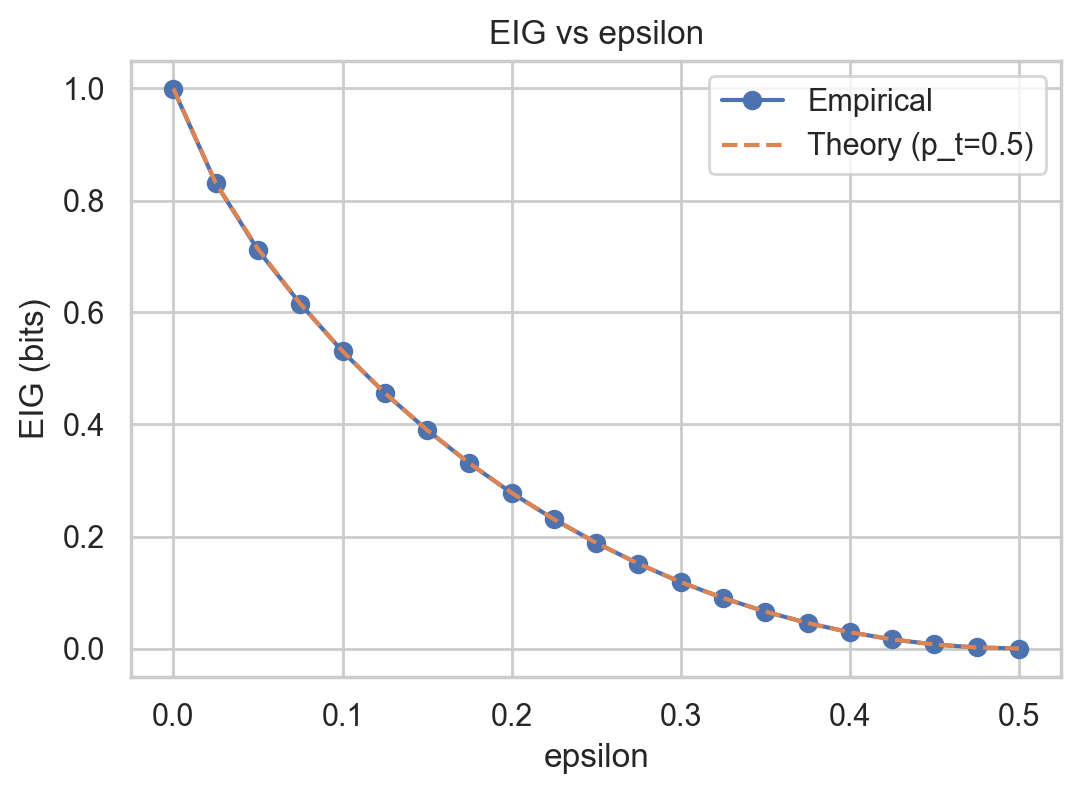

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Sweep epsilon in [0.0, 0.5]
epsilons = np.linspace(0.0, 0.5, 21)

# Compute empirical EIG for each epsilon
eig_values = [
    EIGCalculator(seed=42, samples=1000, epsilon=eps)(
        code_question=code_question_random,
        state=BOARD_EMPTY,
        constraints=[(code_question_none, False)],
    )
    for eps in epsilons
]

# Theoretical EIG for p_t = 0.5: H(0.5) - H(epsilon)
H_half = binary_entropy(0.5)
theoretical_values = [H_half - binary_entropy(eps) for eps in epsilons]

# Plot
plt.figure(figsize=(6, 4))
plt.plot(epsilons, eig_values, marker="o", label="Empirical")
plt.plot(epsilons, theoretical_values, linestyle="--", label="Theory (p_t=0.5)")
plt.xlabel("epsilon")
plt.ylabel("EIG (bits)")
plt.title("EIG vs epsilon")
plt.grid(True)
plt.legend()
plt.savefig("eig_vs_epsilon.png", bbox_inches="tight", dpi=300)